In [39]:
import  numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [40]:

dataset = pd.read_csv('iris.csv',names=['sep_l','sep_w','pet_l','pet_w','label'])

In [41]:

dataset

,sep_l,sep_w,pet_l,pet_w,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
dataset['label'] = le.fit_transform(dataset['label'])

In [45]:
dataset

,sep_l,sep_w,pet_l,pet_w,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
X = dataset.iloc[:,0:4].values

In [47]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
y = dataset.iloc[:,4].values

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
X_train.shape

(120, 4)

In [52]:
X_test.shape

(30, 4)

In [53]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=4))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:

history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 1.1109 - accuracy: 0.3667 - val_loss: 1.2033 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0928 - accuracy: 0.3667 - val_loss: 1.1693 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0745 - accuracy: 0.3667 - val_loss: 1.1388 - val_accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0590 - accuracy: 0.3667 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0370 - accuracy: 0.3667 - val_loss: 1.0789 - val_accuracy: 0.2667
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0133 - accuracy: 0.5750 - val_loss: 1.0491 - val_accuracy: 0.5333
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9832 - accuracy: 0.6917 - val_loss: 1.0155 - val_accuracy: 0.5667
Epoch 8/100
4/4 [===

In [57]:
y_pred = model.predict(X_test)

In [58]:
y_pred.round()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [59]:
y_pred = np.argmax(y_pred,axis=1) #on which index the no. is higher is argmax


In [60]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [64]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.1293 - accuracy: 0.9667


[0.12928886711597443, 0.9666666388511658]

In [65]:
history.history

{'loss': [1.1108795404434204,
  1.0927903652191162,
  1.0744725465774536,
  1.0590013265609741,
  1.0369646549224854,
  1.01333749294281,
  0.9831734299659729,
  0.9477495551109314,
  0.913748562335968,
  0.88264399766922,
  0.8557100296020508,
  0.8322075605392456,
  0.8113009333610535,
  0.7914630174636841,
  0.7720311284065247,
  0.7538192868232727,
  0.7349933385848999,
  0.717983603477478,
  0.6998258233070374,
  0.6784117221832275,
  0.6566579341888428,
  0.6393266320228577,
  0.6223518252372742,
  0.6051873564720154,
  0.589413583278656,
  0.5743297338485718,
  0.5604450702667236,
  0.546414315700531,
  0.5331608653068542,
  0.5203345417976379,
  0.5083569884300232,
  0.49700313806533813,
  0.48574191331863403,
  0.47537440061569214,
  0.46503180265426636,
  0.45509201288223267,
  0.44572773575782776,
  0.43658584356307983,
  0.4284808337688446,
  0.4200449585914612,
  0.4126359820365906,
  0.4037429690361023,
  0.3968268036842346,
  0.3888786733150482,
  0.3820227384567261,
  0

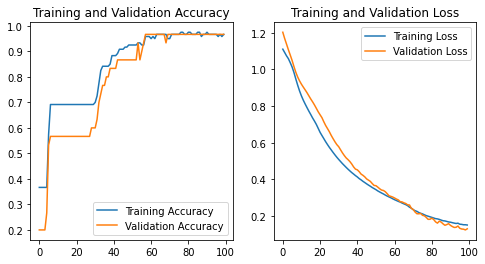

In [66]:
import matplotlib.pyplot as plt
epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()